**Importing all libraries needed**

In [77]:
import pandas as pd
import seaborn as sn
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline


**Importing data from remote link**

In [22]:
url ="http://bit.ly/w-data"
s_data = pd.read_csv(url)
print ("Data imported Successfully")
s_data.head()

Data imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [23]:
s_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [21]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [25]:
s_data.shape

(25, 2)

**Checking Missing Values**

In [29]:
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Checking corelation between Study Hours and Scores**

In [30]:
s_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**VISUALIZING THE DATA**

**Line** **Plot**

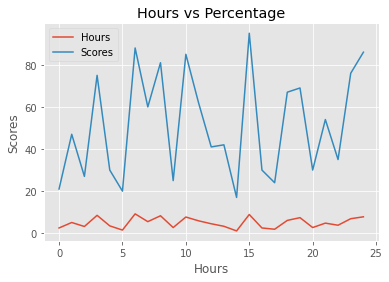

In [35]:
plt.style.use('ggplot')
s_data.plot(kind = 'line')
plt.title('Hours vs Score')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

**Area Plot**

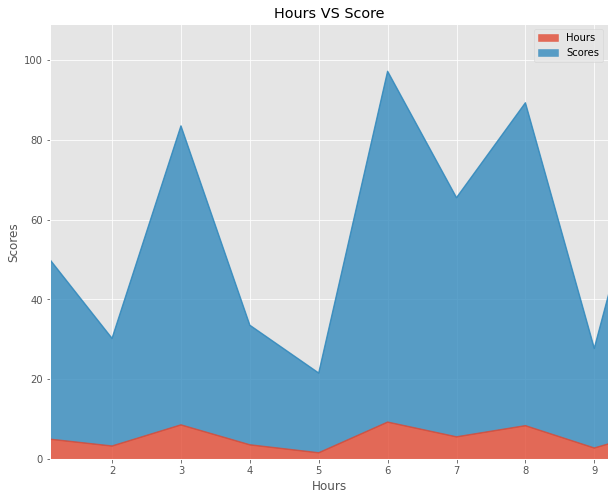

In [59]:
xmin=min(s_data.Hours)
xmax=max(s_data.Hours)
s_data.plot(kind='area',alpha=0.8,stacked=True,figsize=(10,8),xlim=(xmin,xmax))
plt.title('Hours VS Score')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

**Scatter Plot**

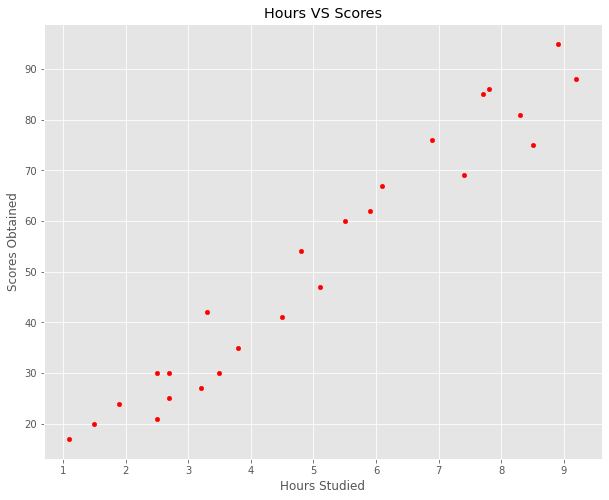

In [56]:
s_data.plot(kind='scatter', x='Hours',y='Scores',color='r',figsize=(10,8))
plt.title('Hours VS Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.show()

**Using Modeling the data to solve Linear Regression**

In [67]:
x=np.asanyarray(s_data[['Hours']])
y=np.asanyarray(s_data[['Scores']])
#using train test split to split the data in train data and test data
train_x, test_x,train_y,test_y= train_test_split(x,y,test_size=0.2, random_state=2)
regressor= LinearRegression()
regressor.fit(train_x,train_y)
print('Training Complete')
print('Coehhicient',regressor.coef_)
print('Intercept',regressor.intercept_)

Training Complete
Coehhicient [[9.94061514]]
Intercept [1.50791048]


**Fitting the line in a single linear regression**

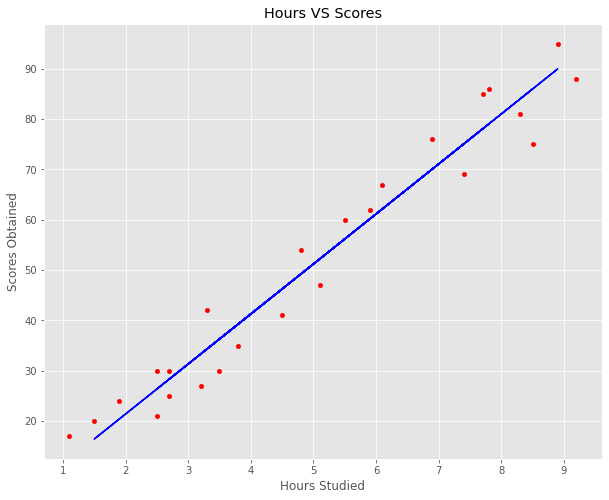

In [69]:
s_data.plot(kind='scatter', x='Hours',y='Scores',color='r',figsize=(10,8))
plt.plot(train_x, regressor.coef_[0]*train_x +regressor.intercept_,color='b')
plt.title('Hours VS Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.show()

**Making Prediction **

In [70]:
print(test_x) #Testing data in hours
y_pred= regressor.predict(test_x) #predicting the scores

[[1.1]
 [2.5]
 [1.9]
 [9.2]
 [6.9]]


In [ ]:
df=pd.DataFrame({'Actual':[test_y] , 'Predicted':[y_pred]})
df

In [88]:
hours=[[9.2]]
own_pred= regressor.predict(hours)
print("Number of hours", hours)
print("predicted ", own_pred[0])

Number of hours [[9.2]]
predicted  [92.9615698]


**Evaluating the Model**

In [89]:
from sklearn import metrics
print ("Mean Absolute Error: ", metrics.mean_absolute_error(test_y, y_pred))

Mean Absolute Error:  4.877039354964476
